# Part 1 - Data Analysis and Bayes Nets

In [45]:
# Import core libararies
import pandas as pd
import numpy as np
import cv2 

# Import Scikit-Learn
import sklearn

# Import plotting library
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for prediction and data handing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import roc_auc_score

#Import Warnings
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Read the training data CSV file
data = pd.read_csv("x_train_all.csv")

In [47]:
# Print the dimensions of the data
data.shape

(9690, 2304)

In [48]:
# Print basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9690 entries, 0 to 9689
Columns: 2304 entries, 0 to 2303
dtypes: float64(2304)
memory usage: 170.3 MB


In [49]:
# Display the first 5 rows of data
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [50]:
# Print some statistical description
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [51]:
#Check if any rows contain missing data
missing_data = data[data.isnull().any(axis=1)].head()

# Print the rows which contain the empty data
missing_data   

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303


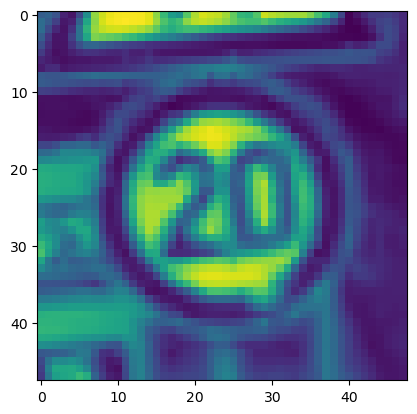

In [52]:
# Extract the eleventh row as an array
instance_to_plot = data.iloc[10].to_numpy()

# Reshape the array as 48x48 array
image_data = instance_to_plot.reshape(48, 48)

# Plot the image
plt.imshow(image_data)
plt.show()

In [53]:
# Normalize the data for scaling to a Common Range
data = data.astype('float') / 255

In [54]:
# Create a new dataset with feature reduction applied
data_sm = np.apply_along_axis(
    func1d=lambda item: cv2.resize(item.reshape(48, 48), dsize=(30, 30)),
    axis=1, arr=data).reshape(-1, 30*30)

# Print the dimensions of the new data
data_sm.shape

(9690, 900)

In [55]:
data_sm

array([[0.30788235, 0.30078431, 0.33313725, ..., 0.38215686, 0.38901961,
        0.37403922],
       [0.28662745, 0.30705882, 0.30431373, ..., 0.30764706, 0.3894902 ,
        0.39890196],
       [0.28352941, 0.30588235, 0.31568627, ..., 0.28431373, 0.31713725,
        0.36431373],
       ...,
       [1.        , 1.        , 1.        , ..., 0.13764706, 0.12647059,
        0.17027451],
       [0.99835294, 0.99945098, 1.        , ..., 0.10843137, 0.10184314,
        0.09776471],
       [0.93905882, 0.92717647, 1.        , ..., 0.09960784, 0.10031373,
        0.0754902 ]])

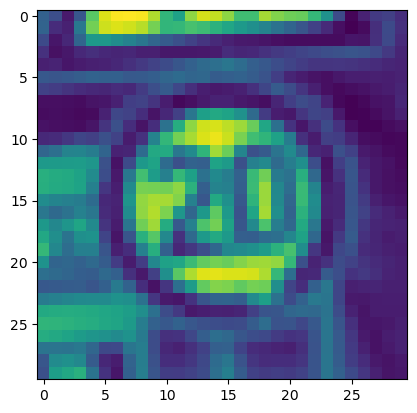

In [56]:
# Plotting the same image with reduced features
image_data = data_sm[10].reshape(30, 30)
plt.imshow(image_data)
plt.show()

In [57]:
# Convert the data_sm array to dataframe
data_sm = pd.DataFrame(data_sm)
data_sm.head()

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,0.307882,0.300784,0.333137,0.370549,0.457255,0.456000,0.479176,0.548627,0.798902,0.959373,...,0.552275,0.419216,0.378431,0.362235,0.316157,0.288118,0.326275,0.382157,0.389020,0.374039
1,0.286627,0.307059,0.304314,0.303255,0.402314,0.501333,0.397020,0.384510,0.680275,0.945490,...,0.535922,0.561529,0.488824,0.388000,0.366235,0.321569,0.274549,0.307647,0.389490,0.398902
2,0.283529,0.305882,0.315686,0.368353,0.421333,0.342078,0.433294,0.755294,0.948392,0.979490,...,0.440157,0.550510,0.550588,0.401843,0.374078,0.333686,0.286784,0.284314,0.317137,0.364314
3,0.264745,0.287333,0.344510,0.427608,0.387059,0.314941,0.575451,0.886667,0.979216,0.981098,...,0.360392,0.429922,0.560196,0.505569,0.384078,0.337294,0.301922,0.276667,0.285765,0.335686
4,0.287020,0.286431,0.297451,0.362078,0.419686,0.327294,0.379020,0.665686,0.916824,0.967373,...,0.358627,0.418824,0.428824,0.395922,0.383608,0.387529,0.384039,0.322745,0.260902,0.280000


In [91]:
data_sm.shape

(9690, 900)

In [58]:
# Importing all the oneVsAll files
class_0_data = pd.read_csv("y_train_0.csv")
class_1_data = pd.read_csv("y_train_1.csv")
class_2_data = pd.read_csv("y_train_2.csv")
class_3_data = pd.read_csv("y_train_3.csv")
class_4_data = pd.read_csv("y_train_4.csv")
class_5_data = pd.read_csv("y_train_5.csv")
class_6_data = pd.read_csv("y_train_6.csv")
class_7_data = pd.read_csv("y_train_7.csv")
class_8_data = pd.read_csv("y_train_8.csv")
class_9_data = pd.read_csv("y_train_9.csv")

In [59]:
# Joining the oneVsAll data with the training data
data_0 = class_0_data.join(data_sm)
data_1 = class_1_data.join(data_sm)
data_2 = class_2_data.join(data_sm)
data_3 = class_3_data.join(data_sm)
data_4 = class_4_data.join(data_sm)
data_5 = class_5_data.join(data_sm)
data_6 = class_6_data.join(data_sm)
data_7 = class_7_data.join(data_sm)
data_8 = class_8_data.join(data_sm)
data_9 = class_9_data.join(data_sm)

In [60]:
# Create the correlation matrix
corr_matrix = data_2.corr()
corr_data = corr_matrix["Class Label"].sort_values(ascending=False)

# Print out the top 20 features
corr_data[0:20]

Class Label    1.000000
522            0.279336
523            0.274288
404            0.272423
493            0.271942
492            0.265742
403            0.254642
373            0.235499
317            0.231402
439            0.226907
470            0.226484
316            0.225876
521            0.225672
500            0.225226
616            0.223078
617            0.222153
586            0.221382
469            0.220461
409            0.214685
520            0.214646
Name: Class Label, dtype: float64

In [61]:
# Listing the neeeded features to extract
cols = [
  '873', '874', '872', '843', '875', '787', '844', '786',
  '815', '842', '845', '785', '816', '814', '817', '818',
  '846', '788', '756', '876', '430', '401', '460', '459',
  '431', '400', '429', '489', '490', '488', '518', '253',
  '254', '255', '458', '224', '282', '252', '519', '256',
  '522', '523', '404', '493', '492', '403', '373', '317',
  '439', '470', '316', '521', '500', '616', '617', '586',
  '469', '409', '520', '552', '209', '208', '269', '238',
  '239', '179', '267', '207', '237', '268', '178', '236',
  '266', '118', '177', '299', '298', '149', '88',  '206',
  '583', '554', '524', '461', '525', '584', '432', '462',
  '494', '582', '495', '553', '555', '347', '348', '318',
  '501', '669', '681', '581'
]

# Creating a new subset and saving into a CSV file
data_to_save = data[cols]
data_to_save.to_csv("subset_2.csv")

In [62]:
# Read the target training data CSV file
data_train = pd.read_csv("y_train_all.csv")

In [63]:
data_train.tail()

,0
9685,9
9686,9
9687,9
9688,9
9689,9


In [64]:
# Splitting the data into Train and Test from traning dataset
X_train, X_test, y_train, y_test = train_test_split(data_sm, data_train, test_size = 0.3, random_state = 1)

In [65]:
# Multinominal Naive Bayes on whole dataset
from sklearn.naive_bayes import MultinomialNB
Model2 = MultinomialNB(force_alpha=True)
Model2.fit(X_train, y_train)

y_pred1 = Model2.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred1))
# Accuracy score
print('accuracy is',accuracy_score(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.14      0.42      0.21        55
           1       0.38      0.23      0.28       669
           2       0.35      0.32      0.33       669
           3       0.31      0.39      0.34       418
           4       0.41      0.58      0.48       613
           5       0.22      0.53      0.31        59
           6       0.06      0.03      0.04       111
           7       0.39      0.23      0.29        80
           8       0.83      0.20      0.32       150
           9       0.32      0.20      0.25        83

    accuracy                           0.35      2907
   macro avg       0.34      0.31      0.29      2907
weighted avg       0.37      0.35      0.34      2907

accuracy is 0.3464052287581699


In [66]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[ 23,   8,  14,   6,   4,   0,   0,   0,   0,   0],
       [ 94, 152, 150,  94, 155,   0,  11,   0,   0,  13],
       [ 30,  83, 212,  89, 239,   3,   5,   2,   0,   6],
       [  9,  56,  92, 163,  95,   0,   3,   0,   0,   0],
       [ 10,  62,  72, 106, 358,   0,   1,   0,   0,   4],
       [  0,   2,  14,   1,   2,  31,   1,   3,   4,   1],
       [  0,  16,  31,  29,   7,  21,   3,   3,   0,   1],
       [  0,   3,   6,  15,   3,  26,   5,  18,   2,   2],
       [  0,  12,  14,  10,   4,  40,  17,  14,  30,   9],
       [  1,   5,   8,  21,   5,  19,   1,   6,   0,  17]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted')

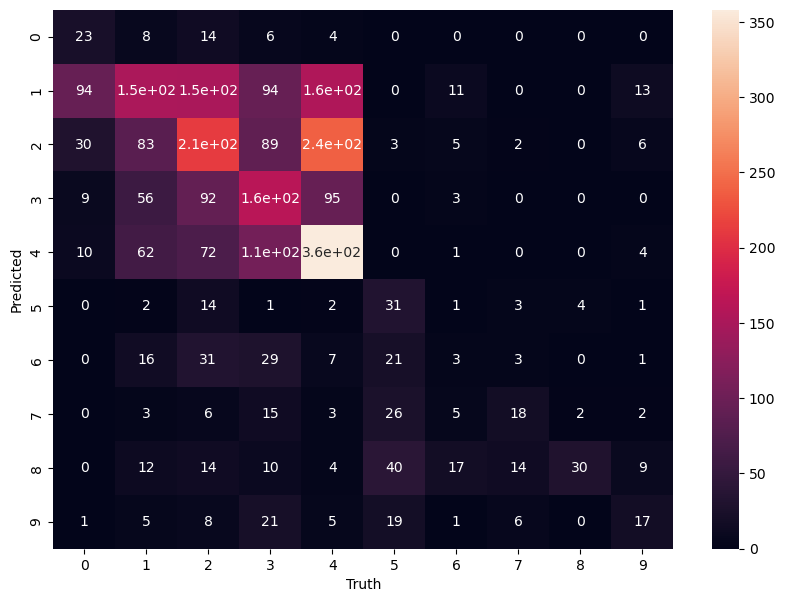

In [67]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [68]:
n_classes = 10  # Number of classes
y_true = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # One-hot encoding of true labels
y_scores = np.random.rand(len(y_pred1), n_classes)  # predicted probabilities

In [69]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [70]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

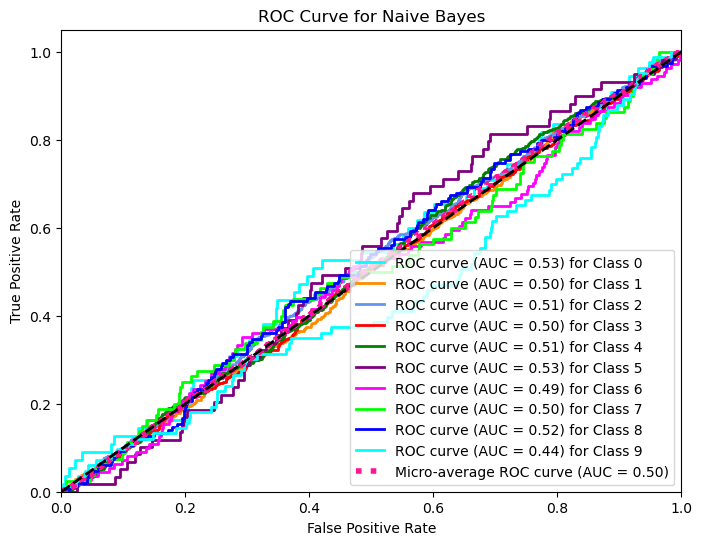

In [71]:
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'magenta', 'lime', 'blue', 'cyan']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for Class {i}')

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='Micro-average ROC curve (AUC = {0:0.2f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

In [72]:
data1 = pd.read_csv("subset_1.csv")
data2 = pd.read_csv("subset_2.csv")
data3 = pd.read_csv("subset_3.csv")

In [73]:
data2.shape

(9690, 101)

In [74]:
# Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(data1, data_train, test_size = 0.3, random_state = 0)

In [75]:
# Naive Bayes 1
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred2 = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred2))
# Accuracy score
print('accuracy is',accuracy_score(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.20      0.60      0.30        65
           1       0.67      0.27      0.39       650
           2       0.63      0.36      0.46       676
           3       0.31      0.75      0.44       426
           4       0.54      0.24      0.33       587
           5       0.78      0.49      0.60        74
           6       0.20      0.40      0.27       114
           7       0.32      0.44      0.37        71
           8       0.38      0.40      0.39       176
           9       0.22      0.65      0.33        68

    accuracy                           0.40      2907
   macro avg       0.43      0.46      0.39      2907
weighted avg       0.52      0.40      0.40      2907

accuracy is 0.3955968352253182


In [76]:
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[ 39,   9,   2,   5,   5,   0,   0,   0,   3,   2],
       [118, 178,  58, 169,  50,   1,  21,   0,  35,  20],
       [ 14,  29, 245, 189,  44,   2,  51,   7,  45,  50],
       [  7,   1,  17, 321,   9,   0,  36,   1,  10,  24],
       [ 14,  45,  61, 285, 140,   0,  10,   2,  12,  18],
       [  0,   0,   1,  11,   7,  36,   6,   5,   6,   2],
       [  0,   2,   0,  43,   3,   0,  46,  10,   2,   8],
       [  0,   0,   2,   1,   0,   0,  27,  31,   0,  10],
       [  2,   0,   2,  23,   0,   7,  18,  33,  70,  21],
       [  0,   0,   0,   2,   1,   0,  12,   7,   2,  44]], dtype=int64)

In [77]:
# Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(data2, data_train, test_size = 0.3, random_state = 1)

In [78]:
# Naive Bayes 2
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred3 = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred3))
# Accuracy score
print('accuracy is',accuracy_score(y_pred3,y_test))

              precision    recall  f1-score   support

           0       0.57      0.78      0.66        55
           1       0.71      0.52      0.61       669
           2       0.51      0.55      0.53       669
           3       0.61      0.32      0.42       418
           4       0.48      0.75      0.59       613
           5       0.47      0.92      0.62        59
           6       0.96      0.42      0.59       111
           7       0.54      0.84      0.65        80
           8       0.62      0.41      0.50       150
           9       0.83      0.48      0.61        83

    accuracy                           0.56      2907
   macro avg       0.63      0.60      0.58      2907
weighted avg       0.60      0.56      0.55      2907

accuracy is 0.5600275197798418


In [79]:
cm3 = confusion_matrix(y_test, y_pred3)
cm3

array([[ 43,   8,   4,   0,   0,   0,   0,   0,   0,   0],
       [ 32, 351, 286,   0,   0,   0,   0,   0,   0,   0],
       [  0, 108, 370,  45, 146,   0,   0,   0,   0,   0],
       [  0,   6,   8, 134, 270,   0,   0,   0,   0,   0],
       [  0,  18,  61,  40, 460,  34,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  54,   2,   0,   3,   0],
       [  0,   0,   0,   0,   0,  26,  47,  20,  18,   0],
       [  0,   0,   0,   0,   0,   0,   0,  67,  13,   0],
       [  0,   0,   0,   0,  42,   0,   0,  38,  62,   8],
       [  0,   0,   0,   0,  39,   0,   0,   0,   4,  40]], dtype=int64)

In [80]:
# Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(data3, data_train, test_size = 0.3, random_state = 0)

In [81]:
# Naive Bayes on dataset3
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred4 = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred4))
# Accuracy score
print('accuracy is',accuracy_score(y_pred4,y_test))

              precision    recall  f1-score   support

           0       0.19      0.72      0.31        65
           1       0.55      0.28      0.37       650
           2       0.59      0.34      0.43       676
           3       0.33      0.71      0.45       426
           4       0.46      0.22      0.30       587
           5       0.82      0.24      0.38        74
           6       0.20      0.52      0.29       114
           7       0.20      0.45      0.28        71
           8       0.54      0.40      0.46       176
           9       0.25      0.50      0.33        68

    accuracy                           0.38      2907
   macro avg       0.41      0.44      0.36      2907
weighted avg       0.48      0.38      0.38      2907

accuracy is 0.38011695906432746


In [82]:
cm4 = confusion_matrix(y_test, y_pred4)
cm4

array([[ 47,   4,   3,   2,   6,   0,   0,   0,   0,   3],
       [134, 181,  93, 122,  48,   0,  41,   0,  21,  10],
       [ 19,  71, 229, 173,  81,   1,  39,  14,  11,  38],
       [ 13,   2,  14, 303,  18,   0,  47,   2,  15,  12],
       [ 28,  67,  42, 265, 132,   0,  24,  11,   3,  15],
       [  0,   0,   0,  11,   0,  18,   9,  30,   6,   0],
       [  0,   3,   0,  27,   0,   0,  59,  13,   2,  10],
       [  0,   0,   3,   3,   0,   0,  31,  32,   0,   2],
       [  1,   1,   2,   8,   0,   3,  35,  44,  70,  12],
       [  0,   0,   0,   3,   0,   0,  14,  15,   2,  34]], dtype=int64)